\textbf{Copyright:} Wojciech Kowalewski WMiI UAM

\textbf{Kurs}: Modelowanie geometryczne 2021/22

---
---
#  Modelowanie geometryczne
---
---
#  I. Modelowanie parametryczne

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets

In [20]:
def dot(a,b):
    """
    a,b: wektory
    """
    assert len(a)==len(b), "Nierówne długosci wektrów"
    res = 0
    for i in range(len(a)):
        res += a[i]*b[i]
    return res

## 1. Krzywe Hermite'a stopnia 3
======================================

### 1.1. Macierz funkcji bazowych

In [21]:
hermite_basis_matrix_2D = [
        [2.0,-3.0,0.0,1.0],
        [-2.0,3.0,0.0,0.0],
        [1.0,-2.0,1.0,0.0],
        [1.0,-1.0,0.0,0.0]
]
hermite_basis_matrix_2D

[[2.0, -3.0, 0.0, 1.0],
 [-2.0, 3.0, 0.0, 0.0],
 [1.0, -2.0, 1.0, 0.0],
 [1.0, -1.0, 0.0, 0.0]]

In [22]:
hermite_basis_function_2D = []
hermite_basis_function_2D.append(
    lambda t: hermite_basis_matrix_2D[0][0]*t**3 + hermite_basis_matrix_2D[0][1]*t**2 + hermite_basis_matrix_2D[0][2]*t + hermite_basis_matrix_2D[0][3],
)    
hermite_basis_function_2D.append(
lambda t: hermite_basis_matrix_2D[1][0]*t**3 + hermite_basis_matrix_2D[1][1]*t**2 + hermite_basis_matrix_2D[1][2]*t + hermite_basis_matrix_2D[1][3]
)
hermite_basis_function_2D.append(
    lambda t: hermite_basis_matrix_2D[2][0]*t**3 + hermite_basis_matrix_2D[2][1]*t**2 + hermite_basis_matrix_2D[2][2]*t + hermite_basis_matrix_2D[2][3]
)
hermite_basis_function_2D.append(
lambda t: hermite_basis_matrix_2D[3][0]*t**3 + hermite_basis_matrix_2D[3][1]*t**2 + hermite_basis_matrix_2D[3][2]*t + hermite_basis_matrix_2D[3][3]
)


### 1.2. Wykresy funkcji bazowych

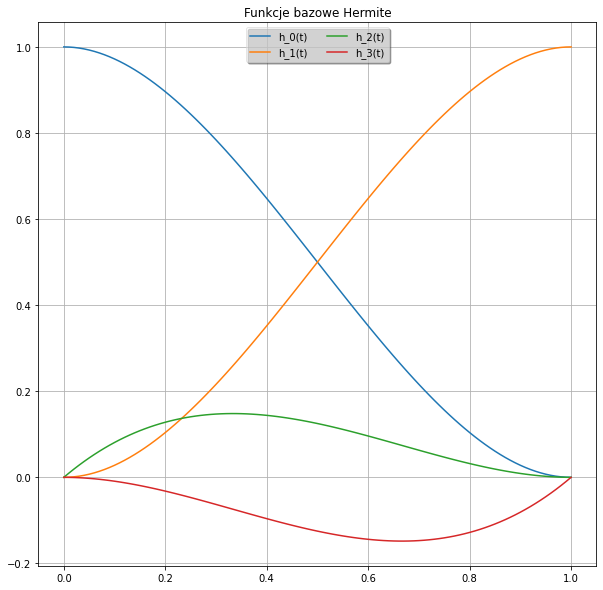

In [23]:
%matplotlib inline

t = np.arange(0.0, 1.01, 0.01)


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Funkcje bazowe Hermite")

for n in range(4):
    ax.plot(t,hermite_basis_function_2D[n](t) , label="h_"+str(n)+"(t)")

leg = ax.legend(loc='upper center', ncol=2, shadow='True')
leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

In [24]:
def find_ext(x,y, lp, lk):
    t = np.arange(lp, lk, 0.001)
    xmin = xmax = x(lp)
    ymin = ymax = y(lp)
    for p in t:
        if x(p) < xmin:
            xmin = x(p)
        else:
            if x(p) > xmax:
                xmax = x(p)
        if y(p) < ymin:
            ymin = y(p)
        else:
            if y(p) > ymax:
                ymax = y(p)
    return [[xmin,xmax],[ymin,ymax]]

### 1.3. Przykłady

#### 1.3.1. Przykład 1

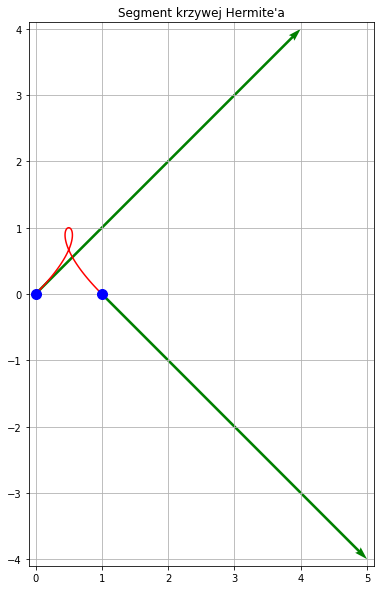

In [25]:
%matplotlib inline

t = np.arange(0.0, 1.01, 0.01)

Pp = [0.0,0.0]
Pk = [1.0,0.0]
Tp = [4.0,4.0]
Tk = [4.0,-4.0]

lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Segment krzywej Hermite'a")


def X(t):
    return Pp[0]*hermite_basis_function_2D[0](t) + Pk[0]*hermite_basis_function_2D[1](t) + Tp[0]*hermite_basis_function_2D[2](t) + Tk[0]*hermite_basis_function_2D[3](t)

def Y(t):
    return Pp[1]*hermite_basis_function_2D[0](t) + Pk[1]*hermite_basis_function_2D[1](t) + Tp[1]*hermite_basis_function_2D[2](t) + Tk[1]*hermite_basis_function_2D[3](t)


extr = find_ext(X,Y,0.0,1.01)

borderXp = min(extr[0][0],Pp[0]+Tp[0],Pk[0]+Tk[0])-0.1
borderXk = max(extr[0][1],Pp[0]+Tp[0],Pk[0]+Tk[0])+0.1

borderYp = min(extr[1][0],Pp[1]+Tp[1],Pk[1]+Tk[1])-0.1
borderYk = max(extr[1][1],Pp[1]+Tp[1],Pk[1]+Tk[1])+0.1


plt.xlim(borderXp, borderXk)
plt.ylim(borderYp, borderYk)

x = X(t)
y = Y(t)

ax.set_aspect('equal')

ax.plot(x,y, color='red')

ax.plot(Pp[0], Pp[1],  color='blue', marker=".", markersize=20)
ax.plot(Pk[0], Pk[1],  color='blue', marker=".", markersize=20)

plt.quiver(Pp[0],Pp[1], Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
plt.quiver(Pk[0],Pk[1], Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


#eg = ax.legend(loc='upper center', ncol=2, shadow='True')
leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

#### 1.3.2. Przykład 2

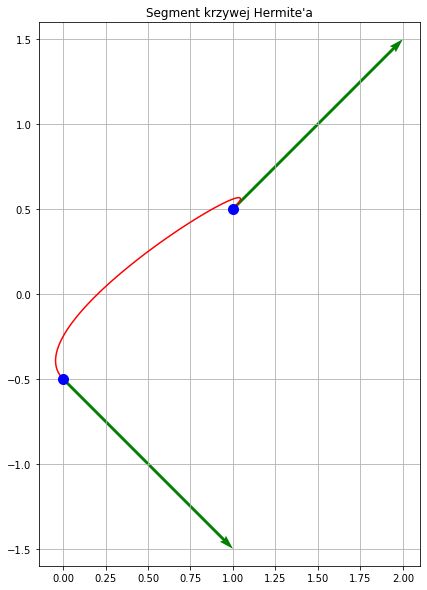

In [26]:
%matplotlib inline

t = np.arange(0.0, 1.01, 0.01)

Pp = [1.0,0.5]
Pk = [0.0,-0.5]
Tp = [1.0,1.0]
Tk = [1.0,-1.0]

lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 

fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Segment krzywej Hermite'a")


def X(t):
    return Pp[0]*hermite_basis_function_2D[0](t) + Pk[0]*hermite_basis_function_2D[1](t) + Tp[0]*hermite_basis_function_2D[2](t) + Tk[0]*hermite_basis_function_2D[3](t)

def Y(t):
    return Pp[1]*hermite_basis_function_2D[0](t) + Pk[1]*hermite_basis_function_2D[1](t) + Tp[1]*hermite_basis_function_2D[2](t) + Tk[1]*hermite_basis_function_2D[3](t)


extr = find_ext(X,Y,0.0,1.01)

borderXp = min(extr[0][0],Pp[0]+Tp[0],Pk[0]+Tk[0])-0.1
borderXk = max(extr[0][1],Pp[0]+Tp[0],Pk[0]+Tk[0])+0.1

borderYp = min(extr[1][0],Pp[1]+Tp[1],Pk[1]+Tk[1])-0.1
borderYk = max(extr[1][1],Pp[1]+Tp[1],Pk[1]+Tk[1])+0.1


plt.xlim(borderXp, borderXk)
plt.ylim(borderYp, borderYk)

x = X(t)
y = Y(t)

ax.set_aspect('equal')

ax.plot(x,y, color='red')

ax.plot(Pp[0], Pp[1],  color='blue', marker=".", markersize=20)
ax.plot(Pk[0], Pk[1],  color='blue', marker=".", markersize=20)

plt.quiver(Pp[0],Pp[1], Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
plt.quiver(Pk[0],Pk[1], Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


#eg = ax.legend(loc='upper center', ncol=2, shadow='True')
leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

#### 1.3.3. Wersja interaktywna

In [27]:
%matplotlib inline


def draw_Hermite_segment(PpX,PpY,PkX,PkY,TpX,TpY,TkX,TkY):
    t = np.arange(0.0, 1.01, 0.01)
    
    lenTp = math.sqrt(TpX**2+TpY**2)/2.54
    lenTk = math.sqrt(TkX**2+TkY**2)/2.54 

    fig, ax = plt.subplots()
    #ustawienie rozmiaru obrazka na 10x10 cali
    fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
    plt.title("Segment krzywej Hermite'a")


    def X(t):
        return PpX*hermite_basis_function_2D[0](t) + PkX*hermite_basis_function_2D[1](t) + TpX*hermite_basis_function_2D[2](t) + TkX*hermite_basis_function_2D[3](t)

    def Y(t):
        return PpY*hermite_basis_function_2D[0](t) + PkY*hermite_basis_function_2D[1](t) + TpY*hermite_basis_function_2D[2](t) + TkY*hermite_basis_function_2D[3](t)


    extr = find_ext(X,Y,0.0,1.01)

    borderXp = min(extr[0][0],PpX+TpX,PkX+TkX)-0.1
    borderXk = max(extr[0][1],PpX+TpX,PkX+TkX)+0.1

    borderYp = min(extr[1][0],PpY+TpY,PkY+TkY)-0.1
    borderYk = max(extr[1][1],PpY+TpY,PkY+TkY)+0.1


    plt.xlim(borderXp, borderXk)
    plt.ylim(borderYp, borderYk)

    x = X(t)
    y = Y(t)

    ax.set_aspect('equal')

    ax.plot(x,y, color='red')

    ax.plot(PpX, PpY,  color='blue', marker=".", markersize=20)
    ax.plot(PkX, PkY,  color='blue', marker=".", markersize=20)

    plt.quiver(PpX,PpY, TpX , TpY,color='green', angles='xy', scale_units='xy', scale=1)
    plt.quiver(PkX,PkY, TkX , TkY,color='green', angles='xy', scale_units='xy', scale=1)


    #eg = ax.legend(loc='upper center', ncol=2, shadow='True')
    #leg.get_frame().set_alpha(0.5)
    plt.grid();

    plt.show()

Pp1 = [0.0,0.0]
Pk1 = [1.0,0.0]
Tp1 = [1.0,1.0]
Tk1 = [1.0,-1.0]
    
#draw_Hermite_segment(Pp1[0],Pp1[1],Pk1[0],Pk1[1],Tp1[0],Tp1[1],Tk1[0],Tk1[1])
grid = widgets.GridspecLayout(4, 2)
grid[0, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Pp1[0],description='PpX')
grid[0, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Pp1[1],description='PpY')
grid[1, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Pk1[0],description='PkX')
grid[1, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Pk1[1],description='PkY')
grid[2, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Tp1[0],description='TpX')
grid[2, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Tp1[1],description='TpY')
grid[3, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Tk1[0],description='TkX')
grid[3, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=Tk1[1],description='TkY')

k1 = widgets.VBox([grid[0,0],grid[1,0],grid[2,0],grid[3,0]])
k2 = widgets.VBox([grid[0,1],grid[1,1],grid[2,1],grid[3,1]])
ui = widgets.HBox([k1,k2])

out = widgets.interactive_output(draw_Hermite_segment, {'PpX': grid[0,0], 'PpY': grid[0,1], 
                                                        'PkX': grid[1,0], 'PkY': grid[1,1],
                                                        'TpX': grid[2,0], 'TpY': grid[2,1], 
                                                        'TkX': grid[3,0], 'TkY': grid[3,1]
                                                       })

display(ui, out)



Output()

## 2. Krzywe Beziera stopnia 3
====================================

### 2.1. Macierz funkcji bazowych

In [28]:
bezier_basis_matrix_2D = [
        [-1.0,3.0,-3.0,1.0],
        [3.0,-6.0,3.0,0.0],
        [-3.0,3.0,.0,0.0],
        [1.0,0.0,0.0,0.0]
]
bezier_basis_matrix_2D

[[-1.0, 3.0, -3.0, 1.0],
 [3.0, -6.0, 3.0, 0.0],
 [-3.0, 3.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0]]

In [29]:
bezier_basis_function_2D = []
bezier_basis_function_2D.append(
    lambda t: bezier_basis_matrix_2D[0][0]*t**3 + bezier_basis_matrix_2D[0][1]*t**2 + bezier_basis_matrix_2D[0][2]*t + bezier_basis_matrix_2D[0][3],
)    
bezier_basis_function_2D.append(
lambda t: bezier_basis_matrix_2D[1][0]*t**3 + bezier_basis_matrix_2D[1][1]*t**2 + bezier_basis_matrix_2D[1][2]*t + bezier_basis_matrix_2D[1][3]
)
bezier_basis_function_2D.append(
    lambda t: bezier_basis_matrix_2D[2][0]*t**3 + bezier_basis_matrix_2D[2][1]*t**2 + bezier_basis_matrix_2D[2][2]*t + bezier_basis_matrix_2D[2][3]
)
bezier_basis_function_2D.append(
lambda t: bezier_basis_matrix_2D[3][0]*t**3 + bezier_basis_matrix_2D[3][1]*t**2 + bezier_basis_matrix_2D[3][2]*t + bezier_basis_matrix_2D[3][3]
)


### 2.2. Wykresy funkcji bazowych

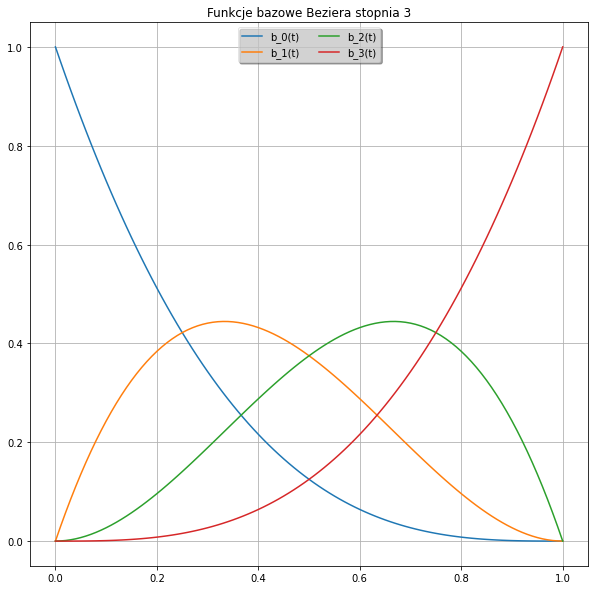

In [30]:
%matplotlib inline

t = np.arange(0.0, 1.01, 0.01)


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Funkcje bazowe Beziera stopnia 3")

for n in range(4):
    ax.plot(t,bezier_basis_function_2D[n](t) , label="b_"+str(n)+"(t)")

leg = ax.legend(loc='upper center', ncol=2, shadow='True')
leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

In [31]:
def find_ext(x,y, lp, lk):
    t = np.arange(lp, lk, 0.001)
    xmin = xmax = x(lp)
    ymin = ymax = y(lp)
    for p in t:
        if x(p) < xmin:
            xmin = x(p)
        else:
            if x(p) > xmax:
                xmax = x(p)
        if y(p) < ymin:
            ymin = y(p)
        else:
            if y(p) > ymax:
                ymax = y(p)
    return [[xmin,xmax],[ymin,ymax]]

### 2.3. Przykłady

#### 2.3.1. Przykład 1

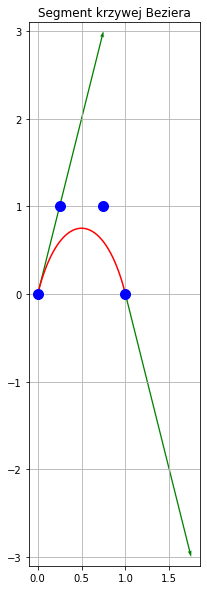

In [32]:
### %matplotlib inline

t = np.arange(0.0, 1.01, 0.01)

P0 = [0.0,0.0]
P1 = [0.25,1.0]
P2 = [0.75,1.0]
P3 = [1.0,0.0]

Tp= [3.0*(P1[0]-P0[0]),3.0*(P1[1]-P0[1])]
Tk= [3.0*(P3[0]-P2[0]),3.0*(P3[1]-P2[1])]

lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Segment krzywej Beziera")


def X(t):
    return P0[0]*bezier_basis_function_2D[0](t) + P1[0]*bezier_basis_function_2D[1](t) + P2[0]*bezier_basis_function_2D[2](t) + P3[0]*bezier_basis_function_2D[3](t)

def Y(t):
    return P0[1]*bezier_basis_function_2D[0](t) + P1[1]*bezier_basis_function_2D[1](t) + P2[1]*bezier_basis_function_2D[2](t) + P3[1]*bezier_basis_function_2D[3](t)


extr = find_ext(X,Y,0.0,1.01)

borderXp = min(extr[0][0],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])-0.1
borderXk = max(extr[0][1],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])+0.1

borderYp = min(extr[1][0],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])-0.1
borderYk = max(extr[1][1],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])+0.1


plt.xlim(borderXp, borderXk)
plt.ylim(borderYp, borderYk)

x = X(t)
y = Y(t)

ax.set_aspect('equal')

ax.plot(x,y, color='red')

ax.plot(P0[0], P0[1],  color='blue', marker=".", markersize=20)
ax.plot(P1[0], P1[1],  color='blue', marker=".", markersize=20)
ax.plot(P2[0], P2[1],  color='blue', marker=".", markersize=20)
ax.plot(P3[0], P3[1],  color='blue', marker=".", markersize=20)



plt.quiver(P0[0],P0[1], Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
plt.quiver(P3[0],P3[1], Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


#eg = ax.legend(loc='upper center', ncol=2, shadow='True')
#eg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

#### 2.3.2. Przykład 2

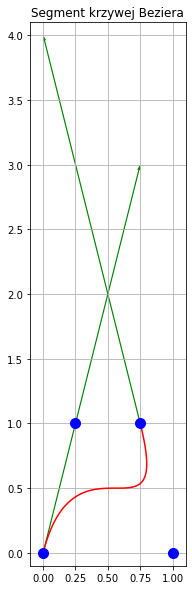

In [33]:
### %matplotlib inline

t = np.arange(0.0, 1.01, 0.01)

P0 = [0.0,0.0]
P1 = [0.25,1.0]
P2 = [1.0,0.0]
P3 = [0.75,1.0]

Tp= [3.0*(P1[0]-P0[0]),3.0*(P1[1]-P0[1])]
Tk= [3.0*(P3[0]-P2[0]),3.0*(P3[1]-P2[1])]

lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Segment krzywej Beziera")


def X(t):
    return P0[0]*bezier_basis_function_2D[0](t) + P1[0]*bezier_basis_function_2D[1](t) + P2[0]*bezier_basis_function_2D[2](t) + P3[0]*bezier_basis_function_2D[3](t)

def Y(t):
    return P0[1]*bezier_basis_function_2D[0](t) + P1[1]*bezier_basis_function_2D[1](t) + P2[1]*bezier_basis_function_2D[2](t) + P3[1]*bezier_basis_function_2D[3](t)


extr = find_ext(X,Y,0.0,1.01)

borderXp = min(extr[0][0],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])-0.1
borderXk = max(extr[0][1],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])+0.1

borderYp = min(extr[1][0],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])-0.1
borderYk = max(extr[1][1],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])+0.1

plt.xlim(borderXp, borderXk)
plt.ylim(borderYp, borderYk)

x = X(t)
y = Y(t)

ax.set_aspect('equal')

ax.plot(x,y, color='red')

ax.plot(P0[0], P0[1],  color='blue', marker=".", markersize=20)
ax.plot(P1[0], P1[1],  color='blue', marker=".", markersize=20)
ax.plot(P2[0], P2[1],  color='blue', marker=".", markersize=20)
ax.plot(P3[0], P3[1],  color='blue', marker=".", markersize=20)



plt.quiver(P0[0],P0[1], Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
plt.quiver(P3[0],P3[1], Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


#eg = ax.legend(loc='upper center', ncol=2, shadow='True')
#leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

#### 2.3.3. Wersja interaktywna

In [34]:
%matplotlib inline


def draw_Bezier_segment(P0X,P0Y,P1X,P1Y,P2X,P2Y,P3X,P3Y):
    t = np.arange(0.0, 1.01, 0.01)
    
    ### %matplotlib inline

    t = np.arange(0.0, 1.01, 0.01)

    Tp= [3.0*(P1X-P0X),3.0*(P1Y-P0Y)]
    Tk= [3.0*(P3X-P2X),3.0*(P3Y-P2Y)]

    lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
    lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 


    fig, ax = plt.subplots()
    #ustawienie rozmiaru obrazka na 10x10 cali
    fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
    plt.title("Segment krzywej Beziera")


    def X(t):
        return P0X*bezier_basis_function_2D[0](t) + P1X*bezier_basis_function_2D[1](t) + P2X*bezier_basis_function_2D[2](t) + P3X*bezier_basis_function_2D[3](t)

    def Y(t):
        return P0Y*bezier_basis_function_2D[0](t) + P1Y*bezier_basis_function_2D[1](t) + P2Y*bezier_basis_function_2D[2](t) + P3Y*bezier_basis_function_2D[3](t)


    extr = find_ext(X,Y,0.0,1.01)

    borderXp = min(extr[0][0],P0X+Tp[0],P3X+Tk[0],P0X,P1X,P2X,P3X)-0.2
    borderXk = max(extr[0][1],P0X+Tp[0],P3X+Tk[0],P0X,P1X,P2X,P3X)+0.2

    borderYp = min(extr[1][0],P0Y+Tp[1],P3Y+Tk[1],P0Y,P1Y,P2Y,P3Y)-0.2
    borderYk = max(extr[1][1],P0Y+Tp[1],P3Y+Tk[1],P0Y,P1Y,P2Y,P3Y)+0.2

    plt.xlim(borderXp, borderXk)
    plt.ylim(borderYp, borderYk)

    x = X(t)
    y = Y(t)

    ax.set_aspect('equal')

    ax.plot(x,y, color='red')

    ax.plot(P0X, P0Y,  color='blue', marker=".", markersize=20)
    ax.plot(P1X, P1Y,  color='blue', marker=".", markersize=20)
    ax.plot(P2X, P2Y,  color='blue', marker=".", markersize=20)
    ax.plot(P3X, P3Y,  color='blue', marker=".", markersize=20)



    plt.quiver(P0X,P0Y, Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
    plt.quiver(P3X,P3Y, Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


    #eg = ax.legend(loc='upper center', ncol=2, shadow='True')
    #leg.get_frame().set_alpha(0.5)
    plt.grid();

    plt.show()

p0 = [0.0,0.0]
p1 = [0.25,1.0]
p2 = [0.75,1.0]
p3 = [1.0,0.0]
    
#draw_Hermite_segment(Pp1[0],Pp1[1],Pk1[0],Pk1[1],Tp1[0],Tp1[1],Tk1[0],Tk1[1])
grid = widgets.GridspecLayout(4, 2)
grid[0, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p0[0],description='P0X')
grid[0, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p0[1],description='P0Y')
grid[1, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p1[0],description='P1X')
grid[1, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p1[1],description='P1Y')
grid[2, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p2[0],description='P2X')
grid[2, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p2[1],description='P2Y')
grid[3, 0] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p3[0],description='P3X')
grid[3, 1] = widgets.FloatSlider(min=-5, max=5, step=0.2,value=p3[1],description='P3Y')

k1 = widgets.VBox([grid[0,0],grid[1,0],grid[2,0],grid[3,0]])
k2 = widgets.VBox([grid[0,1],grid[1,1],grid[2,1],grid[3,1]])
ui = widgets.HBox([k1,k2])

out = widgets.interactive_output(draw_Bezier_segment, {'P0X': grid[0,0], 'P0Y': grid[0,1], 
                                                        'P1X': grid[1,0], 'P1Y': grid[1,1],
                                                        'P2X': grid[2,0], 'P2Y': grid[2,1], 
                                                        'P3X': grid[3,0], 'P3Y': grid[3,1]
                                                       })

display(ui, out)



Output()

### 2.4. Krzywe Beziera dowolnego stopnia

In [35]:
import scipy.special
def bernstein(n,i,t):
    return scipy.special.binom(n,i)*t**i*(1-t)**(n-i)

In [36]:
%matplotlib inline

from IPython.display import clear_output
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from ipywidgets import Button, Layout
from ipywidgets import interact

out = widgets.Output()

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))


def draw_Bezier_segment_n(control_points,out, hull = False):
    t = np.arange(0.0, 1.01, 0.01)
    
    ### %matplotlib inline

    t = np.arange(0.0, 1.01, 0.01)
    
    n = len(control_points)-1

    Tp= [3.0*(control_points[1][0]-control_points[0][0]),3.0*(control_points[1][1]-control_points[0][1])]
    Tk= [3.0*(control_points[n][0]-control_points[n-1][0]),3.0*(control_points[n][1]-control_points[n-1][1])]

    lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
    lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 

    
    with out:
        fig, ax = plt.subplots()
    
    cid = fig.canvas.mpl_connect('button_press_event', onclick)

    #ustawienie rozmiaru obrazka na 10x10 cali
    fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
    plt.title("Segment krzywej Beziera stopnia "+str(n))


    def X(t):
        res = 0
        for i in range(n+1):
            res += control_points[i][0]*bernstein(n,i,t)
        return res
    
    
    def Y(t):
        res = 0
        for i in range(n+1):
            res += control_points[i][1]*bernstein(n,i,t)
        return res
    

    extr = find_ext(X,Y,0.0,1.01)

    
    extr_points = [[control_points[0][0],control_points[0][0]],[control_points[0][1],control_points[0][1]]]
    for i in range(1,n+1):
        if control_points[i][0] <  extr_points[0][0]:
            extr_points[0][0] = control_points[i][0]
        else:
            if control_points[i][0] >  extr_points[0][1]:
                extr_points[0][1] = control_points[i][0]
        if control_points[i][1] <  extr_points[1][0]:
            extr_points[1][0] = control_points[i][1]
        else:
            if control_points[i][1] >  extr_points[1][1]:
                extr_points[1][1] = control_points[i][1]

    borderXp = min(extr[0][0],control_points[0][0]+Tp[0],control_points[n][0]+Tk[0],extr_points[0][0])-0.2
    borderXk = max(extr[0][1],control_points[0][0]+Tp[0],control_points[n][0]+Tk[0],extr_points[0][1])+0.2
    
    borderYp = min(extr[1][0],control_points[0][1]+Tp[1],control_points[n][1]+Tk[1],extr_points[1][0])-0.2
    borderYk = max(extr[1][1],control_points[0][1]+Tp[1],control_points[n][1]+Tk[1],extr_points[1][1])+0.2
    
    

    plt.xlim(borderXp, borderXk)
    plt.ylim(borderYp, borderYk)

    x = X(t)
    y = Y(t)

    ax.set_aspect('equal')

    with out:
        clear_output(True)
        
        ax.plot(x,y, color='red')

        for i in range(n+1):
            ax.plot(control_points[i][0], control_points[i][1],  color='blue', marker=".", markersize=20)



        plt.quiver(control_points[0][0], control_points[0][1], Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
        plt.quiver(control_points[n][0], control_points[n][1], Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


        #eg = ax.legend(loc='upper center', ncol=2, shadow='True')
        #leg.get_frame().set_alpha(0.5)
        plt.grid();

        if hull and len(points)>2:
            Hull = ConvexHull(points)
            #print(Hull.vertices.tolist())
            a=[]
            b=[]
            for i in Hull.vertices.tolist():
                #ax.plot(points[i][0], points[i][1],  color='orange', marker="*", markersize=8)
                a.append(points[i][0])
                b.append(points[i][1])
            a.append(a[0])
            b.append(b[0])
            #print(a)
            #print(b)
            for i in Hull.vertices.tolist():
                #print(points[Hull.vertices.tolist()[i]])
                #ax.plot(points[i][0], points[i][1], 'r--', color='black')
                ax.plot(a, b, 'r--', color='black')
            for i in Hull.vertices.tolist():
                ax.plot(points[i][0], points[i][1],  color='orange', marker="*", markersize=8)
            
            #_ = convex_hull_plot_2d(Hull)
            
        plt.show()


points = [[0.0,0.0], [1.0,0.0],[2.0,2.0]]


pointX = widgets.FloatText(
    value=0.0,
    description='pX',
    disabled=False,
    layout=Layout(width='200px')
)

pointY = widgets.FloatText(
    value=0.0,
    description='pY',
    disabled=False,
    layout=Layout(width='200px')
)


addIdx = widgets.IntText(
    value=0,
    description='Add Idx',
    disabled=False,
    layout=Layout(width='200px')
)

delIdx = widgets.IntText(
    value=0,
    description='Del Idx',
    disabled=False,
    layout=Layout(width='200px')
)

show_hull = widgets.Checkbox(
    value=False,
    description='Show convex hull',
    disabled=False,
    indent=False
)

def hull_fun(val):
    draw_Bezier_segment_n(points,out,val)

def update_plot(b):
    if b.description == 'Add Point':
        points.insert(addIdx.value,[pointX.value,pointY.value])
    if b.description == 'Del Point':
        del points[delIdx.value]
    draw_Bezier_segment_n(points,out,show_hull.value)
    
add_button = widgets.Button(description='Add Point',layout=Layout(width='200px'),merge=False)
del_button = widgets.Button(description='Del Point',layout=Layout(width='200px'))
add_button.on_click(update_plot)
del_button.on_click(update_plot)

grid = widgets.GridspecLayout(4, 2,width='460px')
grid[0, 0] = pointX
grid[1, 0] = pointY
grid[2, 0] = addIdx
grid[3, 0] = add_button
grid[0, 1] = delIdx
grid[1, 1] = del_button



display(grid,out)
interact(hull_fun,val=show_hull)
draw_Bezier_segment_n(points,out,show_hull.value)



GridspecLayout(children=(FloatText(value=0.0, description='pX', layout=Layout(grid_area='widget001', width='20…

Output()

interactive(children=(Checkbox(value=False, description='Show convex hull', indent=False), Output()), _dom_cla…

## Zadania 


   \begin{enumerate}
   \item Do skryptu w punkcie 2.4. dodać możliwość modyfikacji dowolnego punktu kontrolnego (nieobowiązkowe)
   \item Napisać skrypt demonstrujący łączenie krzywych Beziera 3-go stopnia, z ciągłością parametryczną w punkcie łączenia.
   \item Napisać skrypt implementujący rysowanie krzywych Beziera 3-go stopnia algorytmem de Casteljau.
   \end{enumerate}
    Alternatywnie napisać własny program realizujący te zadania.<p></p>



